<a href="https://colab.research.google.com/github/thiagolir4/Data_Cleaning_e_Wrangling/blob/main/Data_Cleaning_e_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

##LENDO ARQUIVO JSON
  

In [2]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv
Saving athletes.csv to athletes.csv
Saving Data_Wrangling_and_Cleaning.ipynb to Data_Wrangling_and_Cleaning.ipynb
Saving good.json to good.json
Saving gym_members_exercise_tracking.csv to gym_members_exercise_tracking.csv
Saving medals.csv to medals.csv


In [3]:
df = pd.read_json("good.json")

In [4]:
df_musics = pd.json_normalize(df["audio_features"])

In [5]:
df_athletes = pd.read_csv("athletes.csv")

In [6]:
df_athletes.dtypes

,0
code,int64
name,object
name_short,object
name_tv,object
gender,object
function,object
country_code,object
country,object
country_full,object
nationality,object


In [7]:
#CAST PARA TROCAR DE TIPO
df_athletes['code'].astype(str)

,code
0,1532872
1,1532873
2,1532874
3,1532944
4,1532945
...,...
11105,4982175
11106,4982762
11107,4983537
11108,4986655


In [8]:
df_athletes['birth_date']

,birth_date
0,1991-10-21
1,1999-01-22
2,1996-12-21
3,1999-11-22
4,1999-10-27
...,...
11105,2001-07-03
11106,1999-01-31
11107,1993-07-29
11108,2003-06-11


In [9]:
pd.to_datetime(df_athletes['birth_date'])

,birth_date
0,1991-10-21
1,1999-01-22
2,1996-12-21
3,1999-11-22
4,1999-10-27
...,...
11105,2001-07-03
11106,1999-01-31
11107,1993-07-29
11108,2003-06-11


In [10]:
df_brazil = df_athletes[df_athletes["country_full"] == "Brazil"]

In [11]:
df_brazil.shape

(290, 35)

In [12]:
df_brazil[df_brazil["nationality"]!="Brazil"]

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
9980,1968081,PARRO Carlos,PARRO C,Carlos PARRO,Male,Alternate Athlete,BRA,Brazil,Brazil,Italy,...,"Wife, Nicola. Son, Luca. Daughter, Margot","English, Portuguese",National (jumping): Mark Todd (NZL).<br>Person...,He developed an interest in horses while stayi...,"Equestrian eventing rider Mark Todd (NZL), six...",NaN,NaN,"Older brother, Andre Parro (equestrian), repre...",NaN,NaN


In [13]:
df_athletes[df_athletes["country_full"].isin(["Brazil","Argentina"])]

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
101,1535729,SERRANO Franco,SERRANO F,Franco SERRANO,Male,Athlete,ARG,Argentina,Argentina,Argentina,...,NaN,Spanish,NaN,NaN,NaN,His family,"""The reward is always greater than any effort....",NaN,NaN,NaN
199,1537180,CEBALLOS Macarena,CEBALLOS M,Macarena CEBALLOS,Female,Athlete,ARG,Argentina,Argentina,Argentina,...,"Father, Claudio. Mother, Liliana Giacomelli (d...",Spanish,National: Gustavo Roldan,Older sister started swimming. “I was very att...,"Swimmer Michael Phelps (USA), 28-time Olympic ...",NaN,"""Stand up and Fight"" is tattooed on her left arm",NaN,NaN,NaN
208,1537209,HEIN Agostina,HEIN A,Agostina HEIN,Female,Athlete,ARG,Argentina,Argentina,Argentina,...,NaN,Spanish,Club: Sebastian Montero,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,1537465,SARAVIA Ulises,SARAVIA U,Ulises SARAVIA,Male,Athlete,ARG,Argentina,Argentina,Argentina,...,NaN,Spanish,Federico Diez Andersen,NaN,"Footballer Lionel Messi (ARG), FIFA World Cup ...",NaN,NaN,NaN,NaN,NaN
231,1537510,BORELLI Florencia,BORELLI F,Florencia BORELLI,Female,Athlete,ARG,Argentina,Argentina,Argentina,...,"Husband, Facundo. Son, Milo (born 2015). Fathe...",Spanish,Personal: Fernando Diaz Sanchez (ARG),NaN,NaN,NaN,NaN,"Twin sister Mariana (athletics), two-time Sout...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,1968116,FONSECA Ruy,FONSECA R,Ruy FONSECA,Male,Athlete,BRA,Brazil,Brazil,Brazil,...,"Wife, Renata. Daughters, Carolina and Cecilia","English, French, Italian, Portuguese, Spanish",William Fox-Pitt (GBR),"His parents were riders, so he following them ...",NaN,His parents,NaN,"Wife, Renata Rabello Costa (equestrian), bronz...",NaN,NaN
9987,1968118,de FREITAS BARCHA Stephan,BARCHA Stephan,Stephan de FREITAS BARCHA,Male,Athlete,BRA,Brazil,Brazil,Brazil,...,"Wife, Roberta Milani. One son. Two daughters",English,NaN,“My father had a farm in the countryside where...,"Equestrian show jumper Ludger Beerbaum (GER), ...","His parents, and coaches, Nelson Pessoa (BRA) ...","""I learn from defeats, not from victories."" (C...","Wife, Roberta Milani (equestrian), has served ...",NaN,NaN
9988,1968125,MANSUR Yuri,MANSUR Y,Yuri MANSUR,Male,Athlete,BRA,Brazil,Brazil,Brazil,...,"Wife, Louise. Children, Pedro and Marie Louise","English, French, Portuguese",NaN,He was not from a family that had horses or co...,Equestrian show jumpers:<br>Nelson Pessoa (BRA...,Brazilian rider Nelson Pessoa,"""My strongest quality, in everything I do, is ...",NaN,NaN,NaN
10951,3430817,SCHEFFER Fernando,SCHEFFER F,Fernando SCHEFFER,Male,Athlete,BRA,Brazil,Brazil,Brazil,...,NaN,Portuguese,"Club: Fernando Possenti (BRA), since September...","Followed his brother into the sport. ""My broth...","Swimmer Kaio Almeida (BRA), four-time Olympian...",NaN,"""Never give up your dreams."" (myInfo)",NaN,"""I don’t listen to music behind the blocks or ...",NaN


In [14]:
df_athletes[df_athletes["height"] >= 170].shape

(4003, 35)

In [15]:
df_athletes[(df_athletes["height"] >= 170) & (df_athletes["country_full"]== "Brazil")] [["country_full","height"]]

,country_full,height
1414,Brazil,177
1415,Brazil,182
1416,Brazil,170
1417,Brazil,182
1418,Brazil,190
...,...,...
9949,Brazil,170
9950,Brazil,175
9952,Brazil,180
9953,Brazil,184


In [16]:
df_athletes[~(df_athletes["height"] >= 170) |  (df_athletes["country_full"]== "Brazil")] [["country_full","height"]]

,country_full,height
0,Armenia,0
1,Armenia,0
2,Armenia,0
3,Armenia,0
4,Armenia,0
...,...,...
11103,Lao People's Democratic Republic,0
11104,Netherlands,168
11106,Ukraine,0
11108,Equatorial Guinea,165


In [17]:
df_brazil["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
df_athletes["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df_brazil["gender"].mode()

,gender
0,Female


In [20]:
df_brazil["gender"].value_counts()

,count
gender,
Female,164
Male,126


In [21]:
df_brazil["gender"].value_counts(normalize=True)*100

,proportion
gender,
Female,56.551724
Male,43.448276


In [22]:
df_athletes["country_full"].value_counts(ascending=True)
#ascending
# True do menor para o maior
# False no maior para o menor


,count
country_full,
Liechtenstein,1
Belize,1
Nauru,1
Somalia,1
Andorra,2
...,...
Japan,431
Germany,457
Australia,475


In [23]:
df_athletes["height"].value_counts()

,count
height,
0,6032
170,291
180,246
175,237
178,206
...,...
222,1
151,1
140,1


##AGRUPAMENTO


In [24]:
df_athletes.groupby("country_full").size().sort_values(ascending=False)

,0
country_full,
United States of America,619
France,600
Australia,475
Germany,457
Japan,431
...,...
Myanmar,2
Belize,1
Liechtenstein,1


In [25]:
df_positive_values = df_athletes[df_athletes['height']>0]

In [26]:
df_positive_values.groupby("gender")['height'].mean().sort_values()

,height
gender,
Female,172.224828
Male,185.363916


In [27]:
df_positive_values.groupby(["country_full","gender"])["height"].mean().unstack()
#a função unstack() "transforma" o agrupamento em colunas, facilita a vizualizaçõa

gender,Female,Male
country_full,,
AIN,174.250000,191.333333
Afghanistan,163.000000,179.000000
Albania,161.000000,193.000000
Algeria,171.400000,186.600000
American Samoa,152.000000,NaN
...,...,...
"Virgin Islands, British",157.000000,180.000000
"Virgin Islands, US",NaN,180.000000
Yemen,NaN,183.000000


In [28]:
df_medals = pd.read_csv("medals.csv", encoding="latin1")

In [29]:
df_medals.head()

,medal_type,medal_code,medal_date,name,gender,discipline,event,event_type,url_event,code,country_code,country,country_long
0,Gold Medal,1.0,2024-07-27,Remco EVENEPOEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136,BEL,Belgium,Belgium
1,Silver Medal,2.0,2024-07-27,Filippo GANNA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520,ITA,Italy,Italy
2,Bronze Medal,3.0,2024-07-27,Wout van AERT,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147,BEL,Belgium,Belgium
3,Gold Medal,1.0,2024-07-27,Grace BROWN,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173,AUS,Australia,Australia
4,Silver Medal,2.0,2024-07-27,Anna HENDERSON,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525,GBR,Great Britain,Great Britain


In [30]:
df_medals.groupby("country")["medal_type"].value_counts().unstack().sort_values(["Gold Medal","Silver Medal","Bronze Medal"],ascending=[False,False,False])

medal_type,Bronze Medal,Gold Medal,Silver Medal
country,,,
United States,42.0,40.0,44.0
China,24.0,40.0,27.0
Japan,13.0,20.0,12.0
Australia,16.0,18.0,19.0
France,22.0,16.0,26.0
...,...,...,...
Peru,1.0,NaN,NaN
Qatar,1.0,NaN,NaN
Singapore,1.0,NaN,NaN


##OPERAÇÕES ARITMÉTICAS

In [31]:
df_athletes_positive_values = df_athletes[(df_athletes["height"] > 0) & (df_athletes["weight"] > 0)]

In [32]:
df_athletes_positive_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 370 to 10986
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                316 non-null    int64  
 1   name                316 non-null    object 
 2   name_short          316 non-null    object 
 3   name_tv             316 non-null    object 
 4   gender              316 non-null    object 
 5   function            316 non-null    object 
 6   country_code        316 non-null    object 
 7   country             316 non-null    object 
 8   country_full        316 non-null    object 
 9   nationality         316 non-null    object 
 10  nationality_full    316 non-null    object 
 11  nationality_code    316 non-null    object 
 12  height              316 non-null    int64  
 13  weight              316 non-null    float64
 14  disciplines         316 non-null    object 
 15  events              316 non-null    object 
 16  birth_dat

In [33]:
df_athletes_positive_values[["height","weight"]]

,height,weight
370,185,98.0
371,189,93.0
372,183,84.0
431,185,75.0
432,181,82.0
...,...,...
10954,184,102.0
10968,183,90.0
10969,185,86.0
10970,185,88.0


In [34]:
df_athletes_positive_values["height_m"] = df_athletes_positive_values["height"] / 100

/tmp/ipython-input-2349614483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_positive_values["height_m"] = df_athletes_positive_values["height"] / 100


In [35]:
df_athletes_positive_values["height_m"]

,height_m
370,1.85
371,1.89
372,1.83
431,1.85
432,1.81
...,...
10954,1.84
10968,1.83
10969,1.85
10970,1.85


In [36]:
df_athletes_positive_values["imc"] = df_athletes_positive_values["weight"] / (df_athletes_positive_values["height_m"]**2)

/tmp/ipython-input-3071150663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_athletes_positive_values["imc"] = df_athletes_positive_values["weight"] / (df_athletes_positive_values["height_m"]**2)


In [37]:
df_athletes_positive_values["imc"]

,imc
370,28.634039
371,26.035105
372,25.082863
431,21.913806
432,25.029761
...,...
10954,30.127599
10968,26.874496
10969,25.127831
10970,25.712199


In [38]:
df_athletes["birth data"] = pd.to_datetime(df_athletes["birth_date"])

In [39]:
from datetime import datetime, timedelta

In [40]:
start_date = datetime(2025, 7, 26)

In [41]:
df_athletes["age"] = (start_date - df_athletes["birth data"])

In [42]:
df_athletes["age"] = df_athletes["age"] / timedelta(days=365)

In [43]:
df_athletes["name"] + " - " + df_athletes["country_code"]

,0
0,ALEKSANYAN Artur - ARM
1,AMOYAN Malkhas - ARM
2,GALSTYAN Slavik - ARM
3,HARUTYUNYAN Arsen - ARM
4,TEVANYAN Vazgen - ARM
...,...
11105,JOSEPH Elijah - TTO
11106,HOMAN Khrystyna - UKR
11107,CHELANGAT Annet Chemengich - UGA
11108,ADA ETO Sefora - GEQ


##FUNÇÕES


In [44]:
def is_adult(age):
  if age >= 18:
    return "Sim"
  else:
    return "Não"

In [45]:
df_athletes["is_adult"] = df_athletes["age"].apply(is_adult)

In [46]:
df_athletes['is_adult'].value_counts(normalize=True) * 100

,proportion
is_adult,
Sim,99.081908
Não,0.918092


In [47]:
def compute_col_functions (col):
  max_value = col.max()
  min_value = col.min()
  mean_value = col.mean()
  median_value = col.median()
  return pd.Series({"media":mean_value,
                    "maximo":max_value,
                    "minimo":min_value,
                    "mediana":median_value})


In [48]:
df_athletes[["height","weight","age"]].apply(compute_col_functions)

,height,weight,age
media,81.79883,2.21511,28.066354
maximo,222.00000,113.00000,70.698630
minimo,0.00000,0.00000,12.964384
mediana,0.00000,0.00000,27.497260


In [49]:
def create_description(row):
  name = row["name"]
  country = row["country_full"]
  return f"Atleta: {name} | {country}"

In [50]:
df_athletes.apply(create_description, axis=1)

,0
0,Atleta: ALEKSANYAN Artur | Armenia
1,Atleta: AMOYAN Malkhas | Armenia
2,Atleta: GALSTYAN Slavik | Armenia
3,Atleta: HARUTYUNYAN Arsen | Armenia
4,Atleta: TEVANYAN Vazgen | Armenia
...,...
11105,Atleta: JOSEPH Elijah | Trinidad and Tobago
11106,Atleta: HOMAN Khrystyna | Ukraine
11107,Atleta: CHELANGAT Annet Chemengich | Uganda
11108,Atleta: ADA ETO Sefora | Equatorial Guinea


##FUNÇÕES LAMBDA

In [51]:
df_athletes["height"].apply(lambda x: x / 100)

,height
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
11105,1.77
11106,0.00
11107,1.74
11108,1.65


In [52]:
df_athletes["age"].apply(lambda x: "Sim" if x >= 18 else "Não").value_counts()

,count
age,
Sim,11008
Não,102


In [53]:
df_athletes["age"].apply(lambda age: is_adult(age))

,age
0,Sim
1,Sim
2,Sim
3,Sim
4,Sim
...,...
11105,Sim
11106,Sim
11107,Sim
11108,Sim


##DISCRETIZAÇÃO

In [54]:
df_athletes["age"]

,age
0,33.786301
1,26.526027
2,28.613699
3,25.693151
4,25.764384
...,...
11105,24.079452
11106,26.501370
11107,32.013699
11108,22.139726


In [55]:
df_uniform = pd.cut(df_athletes["age"], bins=4)
df_uniform.value_counts()

,count
age,
"(12.907, 27.398]",5463
"(27.398, 41.832]",5455
"(41.832, 56.265]",171
"(56.265, 70.699]",21


<Axes: xlabel='age'>

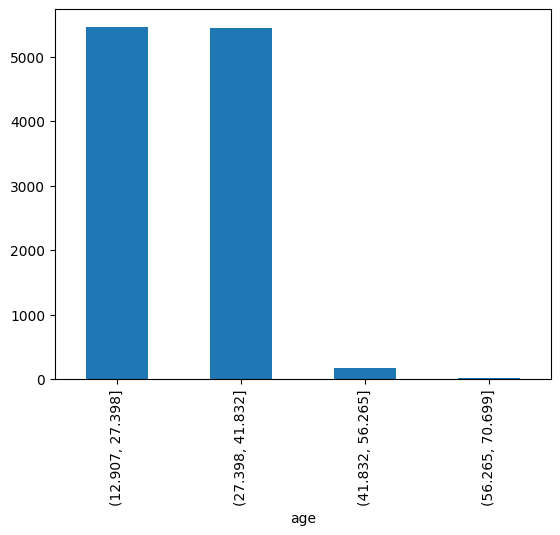

In [56]:
df_uniform.value_counts().plot(kind="bar")

In [57]:
# baseado na frequencia
df_quantiles = pd.qcut(df_athletes["age"], q=4)
df_quantiles.value_counts()

,count
age,
"(12.963000000000001, 24.362]",2780
"(27.497, 31.038]",2780
"(24.362, 27.497]",2775
"(31.038, 70.699]",2775


<Axes: xlabel='age'>

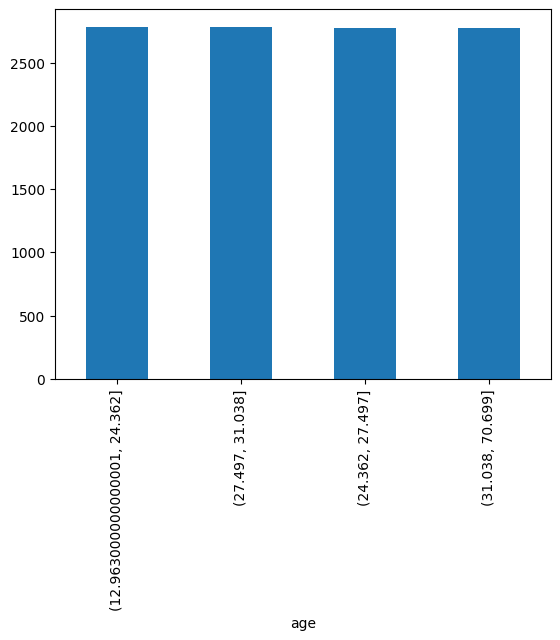

In [58]:
df_quantiles.value_counts().plot(kind="bar")

In [68]:
# Personalizado
range_age = [0,18,30,50,70]
df_customized = pd.cut(df_athletes["age"], bins=range_age)
df_customized.value_counts()

,count
age,
"(18, 30]",7531
"(30, 50]",3427
"(0, 18]",104
"(50, 70]",47


<Axes: xlabel='age'>

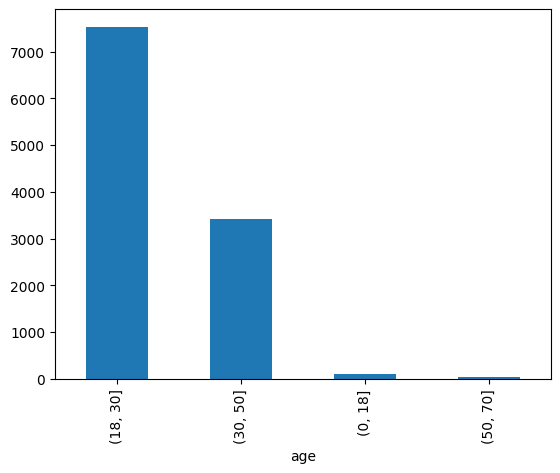

In [69]:
df_customized.value_counts().plot(kind="bar")

## REMOÇÃO DE LINHAS E COLUNAS

In [70]:
df.drop('col1', axis="columns") #apaga a col1, ele gera um novo df, não subscreve o df anterior
#pode ser feito uma lista de colunas/linhas com a seguinte sintaxe df.drop(["col1","col2"], axis="columns")
#axis = 1 (columns)
#axis = 0 (index)
# usando a função  df.drop('col1', axis="columns", inplace=True) ai sim ele faz a exclusão direto no df

KeyError: "['col1'] not found in axis"

##JUNÇÃO DE TABELAS


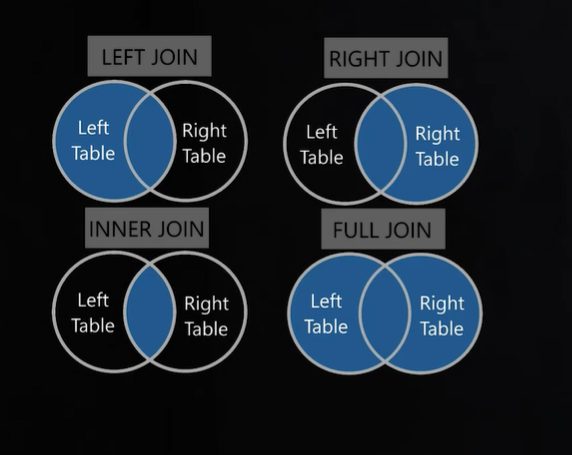

In [63]:
df_athletes["code"] = df_athletes["code"].astype(str)

In [64]:
df_result_left = df_athletes.merge(right=df_medals[["code","medal_type","medal_date","discipline","event"]], on="code", how="left")

In [65]:
df_result_left.shape

(11162, 42)

In [66]:
df_result_inner = df_athletes.merge(right=df_medals[["code","medal_type","medal_date","discipline","event"]], on="code", how="inner")

In [67]:
df_result_inner.shape

(760, 42)

Append

In [81]:
df_athletes_aux = df_athletes[["name","age","gender","country_full","disciplines"]]

In [84]:
# df_athletes_aux.append({
#     "name": "LIRA Thiago",
#     "age":28,
#     "gender":"Male",
#     "country_full":"Brazil",
#     "disciplines":"['Data Science']"
# }, ignore_index=True)

# esse metodo foi descontinuado nas versoes mais atualizadas do pandas, sendo a sintaxe correta e do proximo nootbok

In [82]:
df_athletes_aux = pd.concat(
    [df_athletes_aux, pd.DataFrame([{
        "name": "LIRA Thiago",
        "age": 28,
        "gender": "Male",
        "country_full": "Brazil",
        "disciplines":"['Data Science']"
    }])],
    ignore_index=True
)

In [83]:
df_athletes_aux

,name,age,gender,country_full,disciplines
0,ALEKSANYAN Artur,33.786301,Male,Armenia,['Wrestling']
1,AMOYAN Malkhas,26.526027,Male,Armenia,['Wrestling']
2,GALSTYAN Slavik,28.613699,Male,Armenia,['Wrestling']
3,HARUTYUNYAN Arsen,25.693151,Male,Armenia,['Wrestling']
4,TEVANYAN Vazgen,25.764384,Male,Armenia,['Wrestling']
...,...,...,...,...,...
11106,HOMAN Khrystyna,26.501370,Female,Ukraine,['Judo']
11107,CHELANGAT Annet Chemengich,32.013699,Female,Uganda,['Athletics']
11108,ADA ETO Sefora,22.139726,Female,Equatorial Guinea,['Athletics']
11109,LIUZZI Emanuela,25.263014,Female,Italy,['Wrestling']
